In [1]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#to build classification tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
#for cross validation
from sklearn.model_selection import cross_val_score
#for confusion matrix
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data',header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
df.columns = ['age','sex','cp','restbp','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','hd']
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [6]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [7]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [8]:
len(df.loc[(df['ca'] == '?')|(df['thal'] == '?')]) 

6

In [9]:
df.loc[(df['ca'] == '?')|(df['thal'] == '?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [10]:
len(df)

303

In [11]:
df_no_missing = df.loc[(df['ca'] != '?')&(df['thal'] != '?')]

In [12]:
len(df_no_missing)

297

In [13]:
df_no_missing['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [14]:
df_no_missing['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

In [15]:
X = df_no_missing.drop('hd', axis=1).copy()
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [16]:
y = df_no_missing['hd'].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

In [17]:
X.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
dtype: object

In [18]:
X['cp'].unique()

array([1., 4., 3., 2.])

In [19]:
pd.get_dummies(X, columns=['cp']).head()

,age,sex,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


In [20]:
X['restecg'].unique()

array([2., 0., 1.])

In [21]:
pd.get_dummies(X, columns=['restecg']).head()

,age,sex,cp,restbp,chol,fbs,thalach,exang,oldpeak,slope,ca,thal,restecg_0.0,restecg_1.0,restecg_2.0
0,63.0,1.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,1
1,67.0,1.0,4.0,160.0,286.0,0.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,1,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,1


In [22]:
X['slope'].unique()

array([3., 2., 1.])

In [23]:
pd.get_dummies(X, columns=['slope']).head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal,slope_1.0,slope_2.0,slope_3.0
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,0.0,6.0,0,0,1
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,3.0,3.0,0,1,0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,7.0,0,1,0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,0.0,3.0,0,0,1
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,0.0,3.0,1,0,0


In [24]:
X['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

In [25]:
pd.get_dummies(X, columns=['thal']).head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,0,1,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,1,0,0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,0,0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,1,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,1,0,0


In [26]:
X_encoded = pd.get_dummies(X, columns=['cp','restecg','slope','thal'])
X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [27]:
y.unique()

array([0, 2, 1, 3, 4])

In [28]:
y_not_zero_index = y > 0
y[y_not_zero_index] = 1
y.unique()

array([0, 1])

In [29]:
## split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

## Create a decision tree and fit it to the training data
clf_dlt = DecisionTreeClassifier(random_state=42)
clt_dlt = clf_dlt.fit(X_train, y_train)

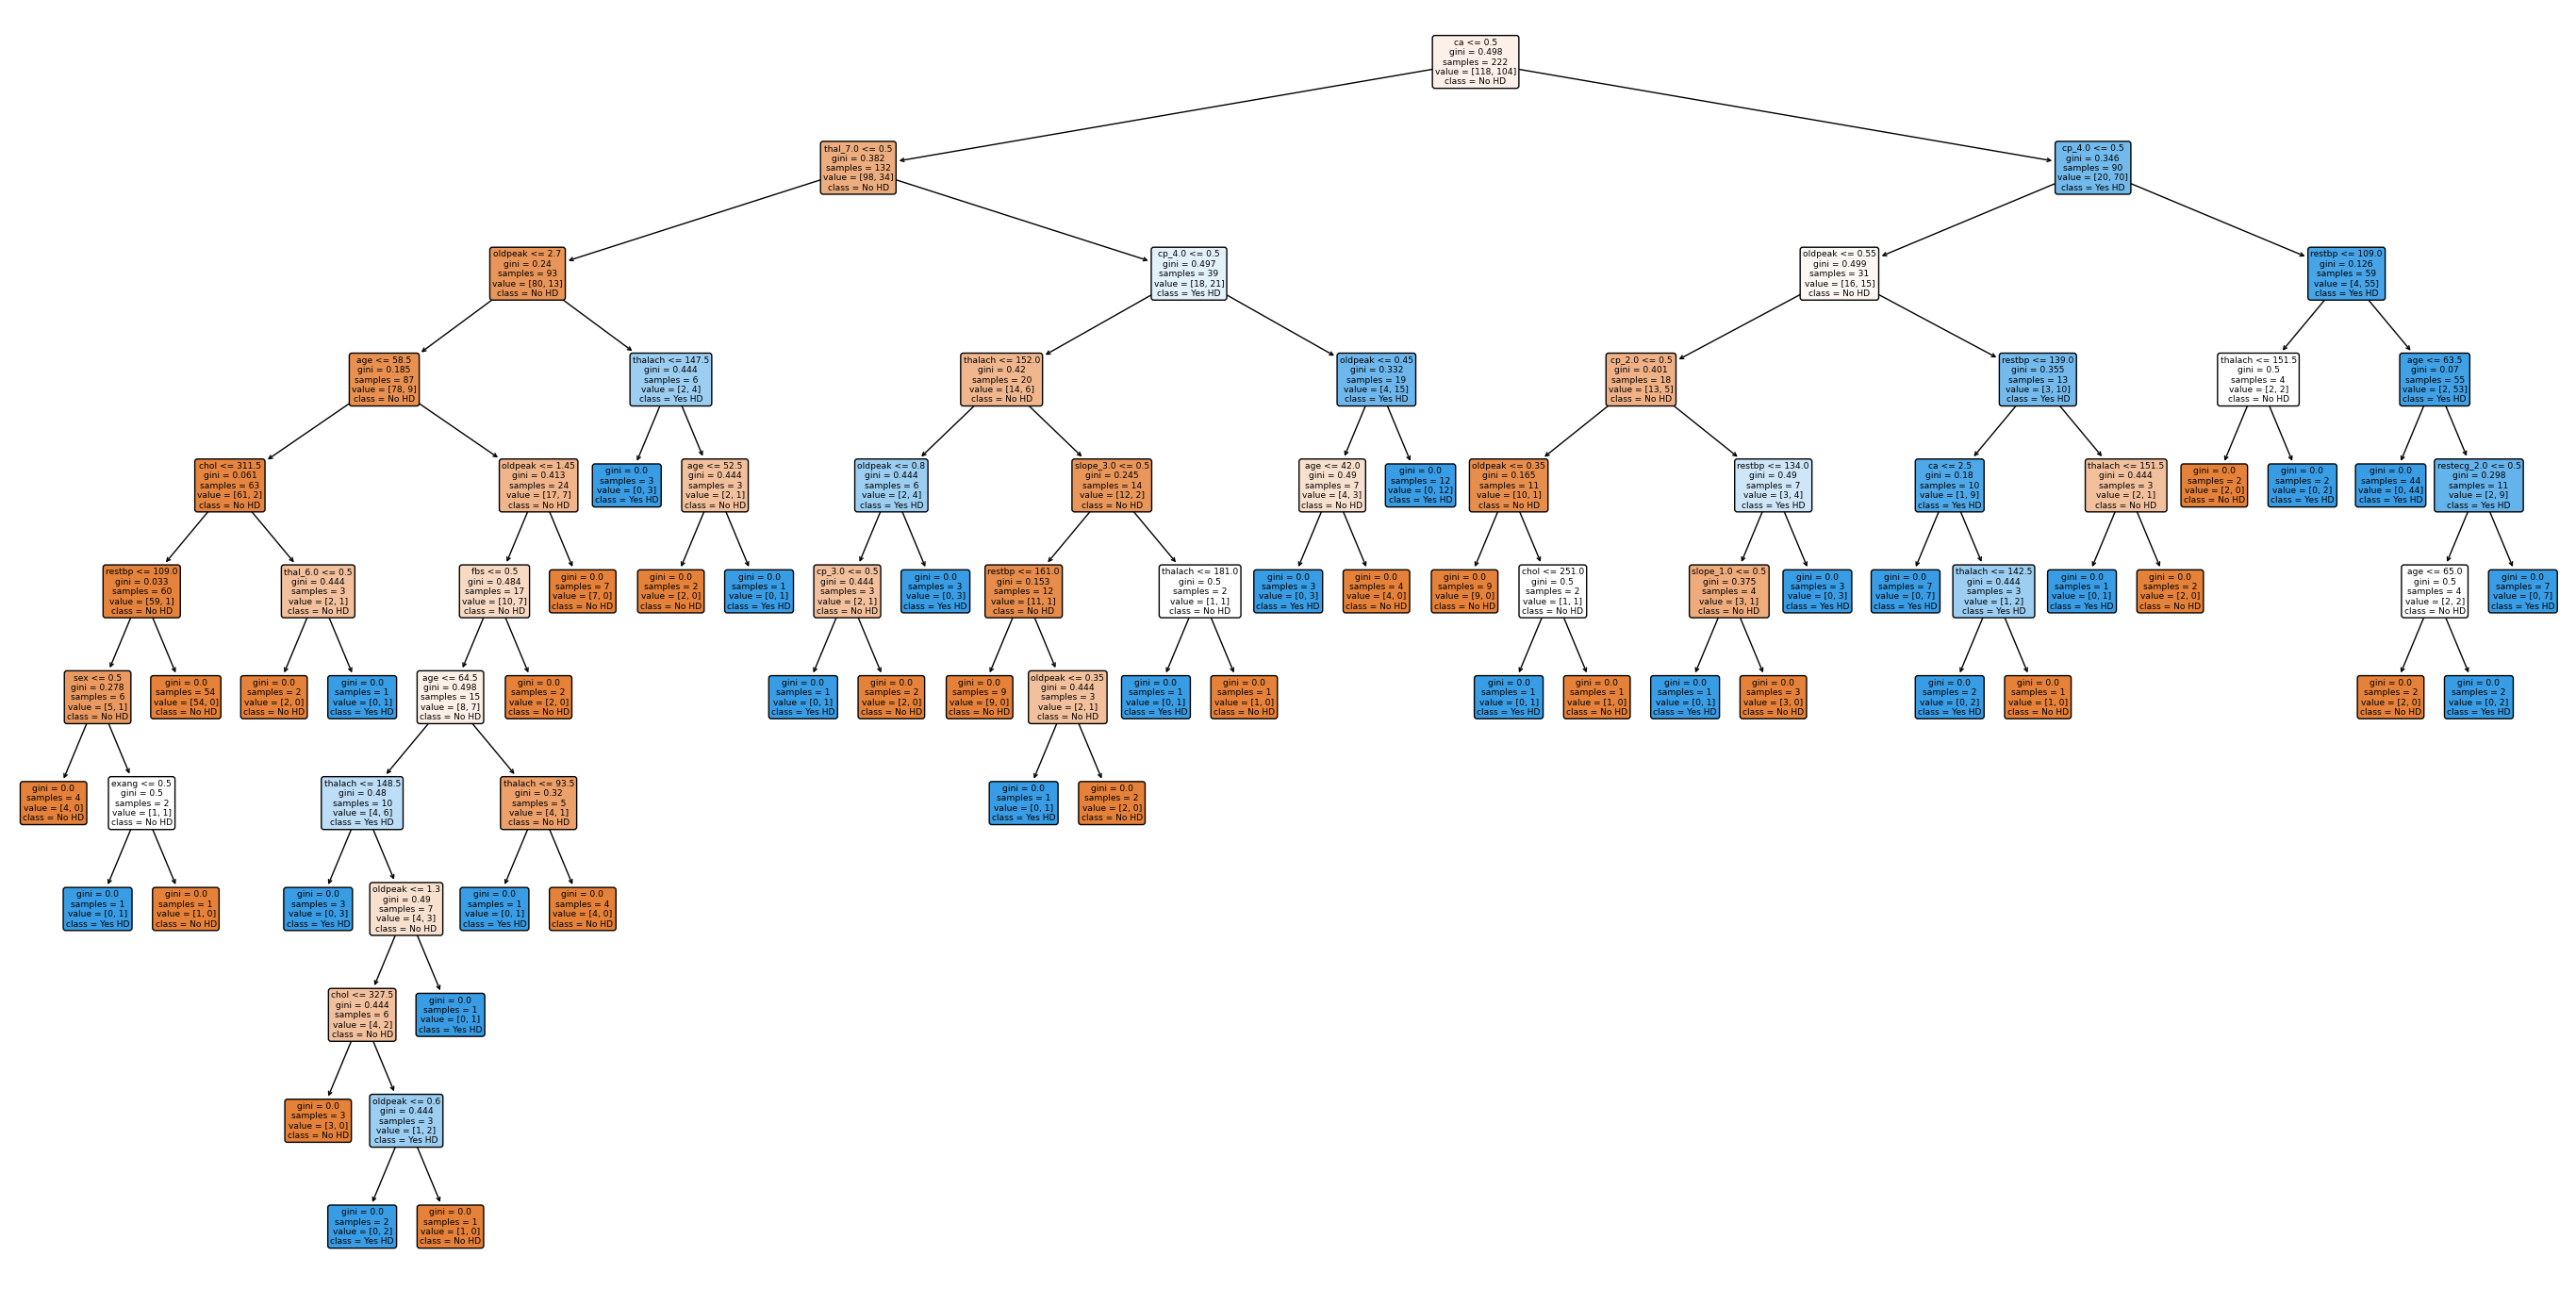

In [30]:
## We can plot the tree 
plt.figure(figsize=(35,17.5))
plot_tree(clf_dlt, filled=True, rounded=True, class_names=["No HD", "Yes HD"],
          feature_names=X_encoded.columns);

In [31]:
#from sklearn.metrics import plot_confusion_matrix

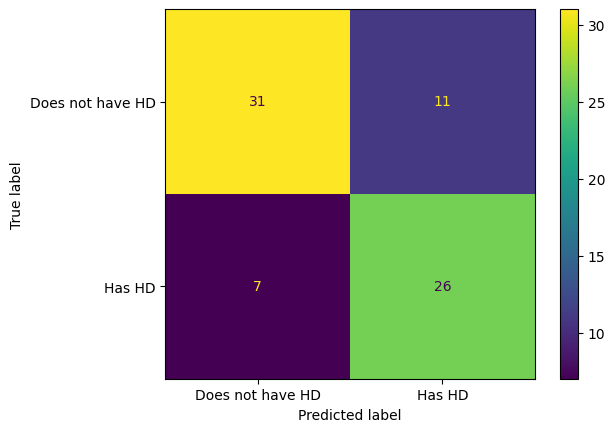

In [32]:
## plot_confusion_matrix() will run the test data down the tree & draw ###########################
# confusion matrix

#plot_confusion_matrix(clf_dlt, X_test, y_test, display_labels=["Does not have HD", "Has HD"])

#disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
#disp.plot()

#plt.show()


ConfusionMatrixDisplay.from_estimator(clf_dlt, X_test, y_test,  display_labels=["Does not have HD", "Has HD"])

In [33]:
path = clf_dlt.cost_complexity_pruning_path(X_train, y_train) # determine values fr Alpha
ccp_alphas = path.ccp_alphas # extarct diff values fr alpha
ccp_alphas = ccp_alphas[:-1] # exclude the max value fr alpha

clf_dlts = [] #create an array that we will put decision tree into

# now create one decision tree per value for alpha and store it in the array
for ccp_alpha in ccp_alphas:
  clf_dlt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
  clf_dlt.fit(X_train, y_train)
  clf_dlts.append(clf_dlt)

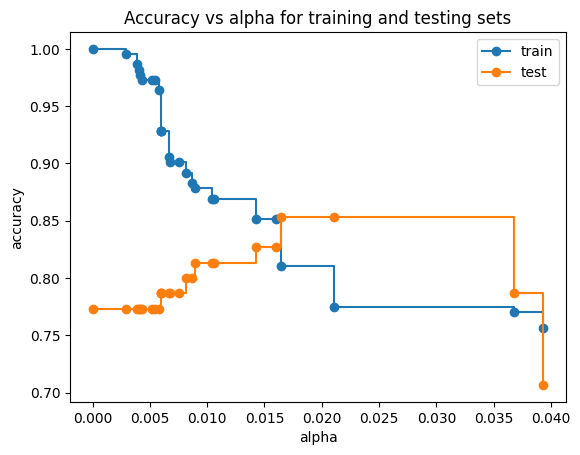

In [34]:
train_scores = [clf_dlt.score(X_train, y_train) for clf_dlt in clf_dlts]
test_scores = [clf_dlt.score(X_test, y_test) for clf_dlt in clf_dlts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

<Axes: xlabel='tree'>

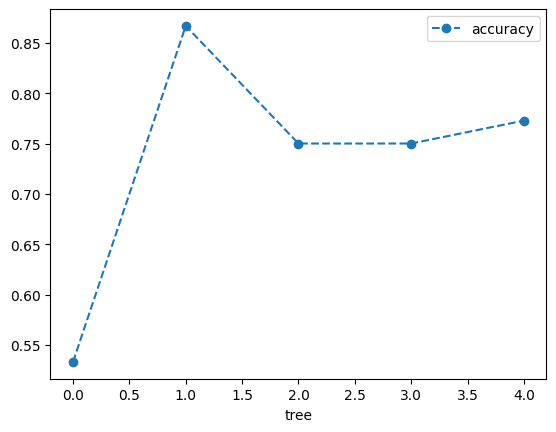

In [35]:
clf_dlt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.016) #create the ree with alpha=0.016

# 5-fold cv create 5 diff tain and test data that r used in tree
scores = cross_val_score(clf_dlt, X_train, y_train, cv=5)
df = pd.DataFrame(data={'tree': range(5), 'accuracy': scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

In [36]:
## create an array to store the res of each fold during cv
alpha_loop_values = []

# fr each candidate val of alpha, run 5-fold cv, store the mean and standard deviation

for ccp_alpha in ccp_alphas:
  clf_dlt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
  scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
  alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

# draw graph of the means and std deviation 
alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha', y='mean_accuracy', yerr='std', marker='o', linestyle='--')

NameError: ignored

In [ ]:
alpha_results[(alpha_results['alpha']>0.014) & (alpha_results['alpha']<0.015)]

In [ ]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha']>0.014) 
                  & (alpha_results['alpha']<0.015)]['alpha']
ideal_ccp_alpha

In [ ]:
## convert idal_cpp from series to float
ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha

In [ ]:
## Build and train new dc tree, only this tym use the optimal val fr alpha
clf_dt_pruned = DecisionTreeClassifier(random_state=42,
                                       ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train)

In [ ]:
################
#plot_confusion_matrix(clf_dt_pruned, X_test, y_test, display_labels=["Does not have HD", "Has HD"])

ConfusionMatrixDisplay.from_estimator(clf_dt_pruned, X_test, y_test,  display_labels=["Does not have HD", "Has HD"])


In [ ]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_pruned, filled=True, rounded=True, class_names=["No HD", "Yes HD"],
          feature_names=X_encoded.columns);